# **$\bullet$ Nicolás López Cid**
---

* Cada respuesta debe ser explicada claramente sin dejar espacio a dobles interpretaciones
* El código de la tarea debe estar comentado.
* Está bien discutir las respuestas con compañeros/as. Está bien buscar la respuesta en internet. No está bien entregar código escrito por otras personas ya sea compañeros, código obtenido por internet u otros.
* Todo código entregado debe ser escrito completamente por usted. De lo contrario, su tarea será penalizada con la nota mínima.

# **Problema 1** (4 puntos)
## ***Clasificación*** Implemente 2 modelos y compare

El conjunto de datos contiene registros anonimizados sobre el comportamiento de estudiantes en redes sociales y los resultados relacionados en su vida. Abarca múltiples países y niveles académicos, centrándose en dimensiones clave como la intensidad de uso, las plataformas preferidas y la dinámica de relaciones. Cada fila representa la respuesta de un estudiante a la encuesta.

**Población:** Estudiantes de entre 16 y 25 años matriculados en enseñanza media, programas de pregrado o postgrado.

**Geografía:** Internacional.

**Período:** Datos recopilados mediante una encuesta en línea realizada una sola vez durante el primer trimestre de 2025.

**Diseño de la encuesta:** Preguntas adaptadas de escalas validadas sobre adicción a redes sociales (por ejemplo, Bergen Social Media Addiction Scale) e índices de conflicto en relaciones.

**Reclutamiento:** Participantes reclutados a través de listas de correo universitarias y plataformas de redes sociales, asegurando diversidad en nivel académico y país.

*   Sexo = 0: femenino; 1: masculino
*   Nivel académico = 0: enseñanza media; 1:pregrado; 2:postgrado
*   Score_salud_mental = 1: pobre a 10: excelente
*   Score_adiccion = 1: bajo a 10: alto.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**$\cdot$ Exploración de datos:**

In [2]:
# Exploración de datos (inserte cuantas líneas estime conveniente)
df = pd.read_csv('P1_Adiccion-RRSS.csv', sep=';', encoding='latin1', index_col='ID')
df

,Edad,Sexo,Nivel_academico,Pais,Prom_diario_uso_hrs,Plataforma_fav,Afecta_performance_academico,Hrs_sueo_por_noche,Score_salud_mental,Relaciones,Conflictos_Social_Media,Score_adiccion
ID,,,,,,,,,,,,
1,19,0,1,Bangladesh,5.2,Instagram,Si,6.5,6,En relacion,3,8
2,22,1,2,India,2.1,Twitter,No,7.5,8,Soltero-a,0,3
3,20,0,1,USA,6.0,TikTok,Si,5.0,5,Complicado,4,9
4,18,1,0,UK,3.0,YouTube,No,7.0,7,Soltero-a,1,4
5,21,1,2,Canada,4.5,Facebook,Si,6.0,6,En relacion,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...
701,20,0,1,Italy,4.7,TikTok,No,7.2,7,En relacion,2,5
702,23,1,2,Russia,6.8,Instagram,Si,5.9,4,Soltero-a,5,9
703,21,0,1,China,5.6,WeChat,Si,6.7,6,En relacion,3,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 705 entries, 1 to 705
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Edad                          705 non-null    int64  
 1   Sexo                          705 non-null    int64  
 2   Nivel_academico               705 non-null    int64  
 3   Pais                          705 non-null    object 
 4   Prom_diario_uso_hrs           705 non-null    float64
 5   Plataforma_fav                705 non-null    object 
 6   Afecta_performance_academico  705 non-null    object 
 7   Hrs_sueo_por_noche           705 non-null    float64
 8   Score_salud_mental            705 non-null    int64  
 9   Relaciones                    705 non-null    object 
 10  Conflictos_Social_Media       705 non-null    int64  
 11  Score_adiccion                705 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 71.6+ KB


In [4]:
df.describe()

,Edad,Sexo,Nivel_academico,Prom_diario_uso_hrs,Hrs_sueo_por_noche,Score_salud_mental,Conflictos_Social_Media,Score_adiccion
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,20.659574,0.499291,1.422695,4.918723,6.868936,6.226950,2.849645,6.436879
std,1.399217,0.500354,0.566635,1.257395,1.126848,1.105055,0.957968,1.587165
min,18.000000,0.000000,0.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,19.000000,0.000000,1.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,21.000000,0.000000,1.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,22.000000,1.000000,2.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,24.000000,1.000000,2.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [5]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

Edad: [19 22 20 18 21 23 24]
Sexo: [0 1]
Nivel_academico: [1 2 0]
Pais: ['Bangladesh' 'India' 'USA' 'UK' 'Canada' 'Australia' 'Germany' 'Brazil'
 'Japan' 'South Korea' 'France' 'Spain' 'Italy' 'Mexico' 'Russia' 'China'
 'Sweden' 'Norway' 'Denmark' 'Netherlands' 'Belgium' 'Switzerland'
 'Austria' 'Portugal' 'Greece' 'Ireland' 'New Zealand' 'Singapore'
 'Malaysia' 'Thailand' 'Vietnam' 'Philippines' 'Indonesia' 'Taiwan'
 'Hong Kong' 'Turkey' 'Israel' 'UAE' 'Egypt' 'Morocco' 'South Africa'
 'Nigeria' 'Kenya' 'Ghana' 'Argentina' 'Chile' 'Colombia' 'Peru'
 'Venezuela' 'Ecuador' 'Uruguay' 'Paraguay' 'Bolivia' 'Costa Rica'
 'Panama' 'Jamaica' 'Trinidad' 'Bahamas' 'Iceland' 'Finland' 'Poland'
 'Romania' 'Hungary' 'Czech Republic' 'Slovakia' 'Croatia' 'Serbia'
 'Slovenia' 'Bulgaria' 'Estonia' 'Latvia' 'Lithuania' 'Ukraine' 'Moldova'
 'Belarus' 'Kazakhstan' 'Uzbekistan' 'Kyrgyzstan' 'Tajikistan' 'Armenia'
 'Georgia' 'Azerbaijan' 'Cyprus' 'Malta' 'Luxembourg' 'Monaco' 'Andorra'
 'San Marino' 'Vati

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27292\2745792887.py:26: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


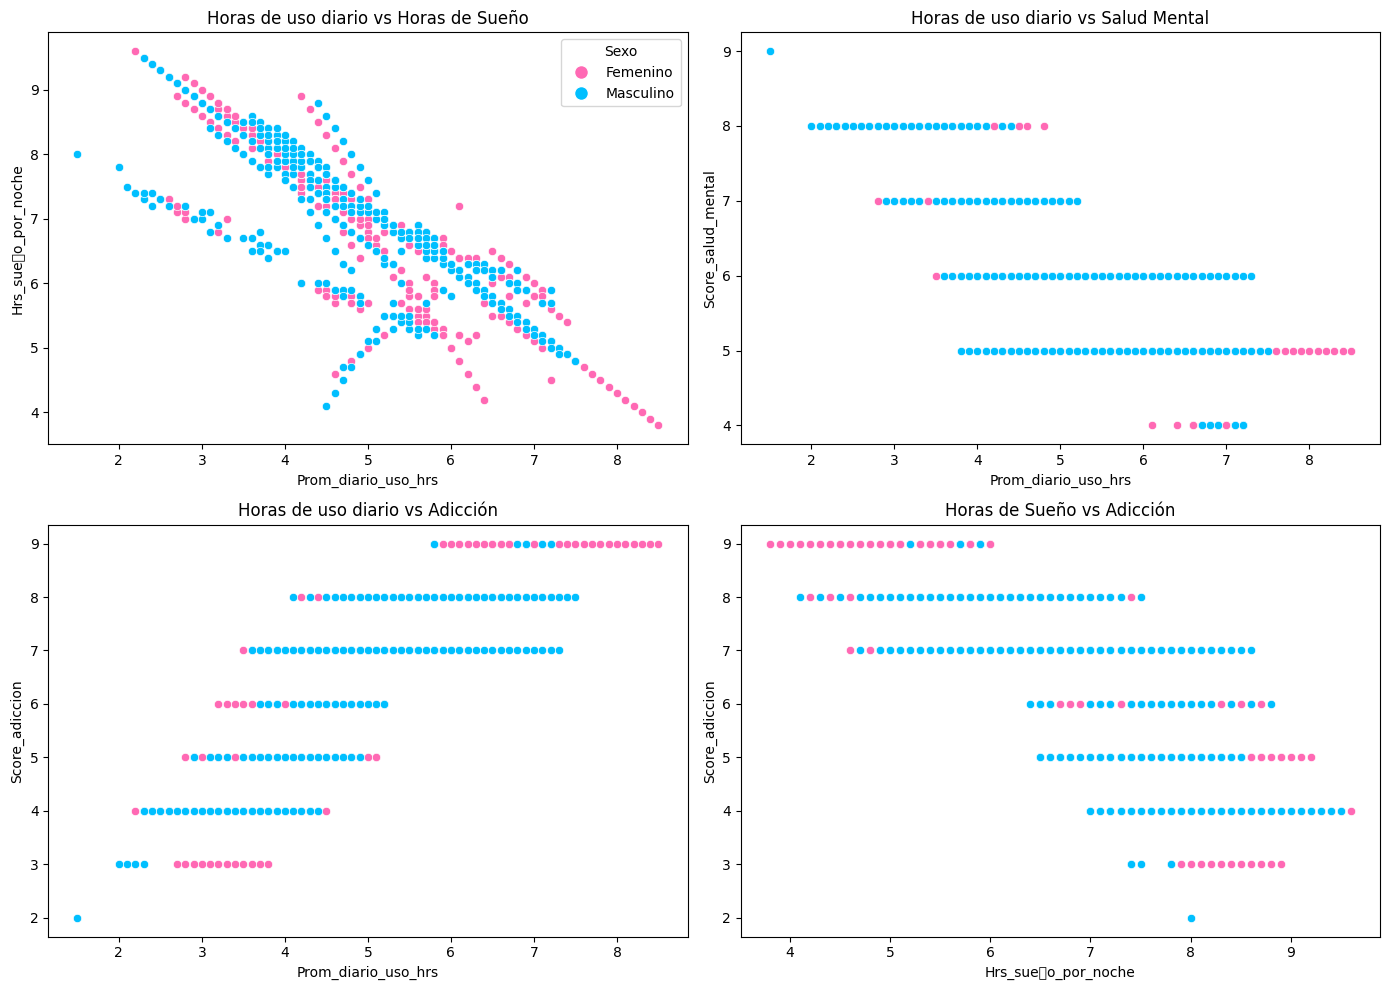

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(14,10))

#Colores para los distintos sexos
colores = {0: "hotpink", 1: "deepskyblue"}

plots = [("Prom_diario_uso_hrs", "Hrs_sueo_por_noche"),
         ("Prom_diario_uso_hrs", "Score_salud_mental"),
         ("Prom_diario_uso_hrs", "Score_adiccion"),
         ("Hrs_sueo_por_noche", "Score_adiccion")]

titulos = ["Horas de uso diario vs Horas de Sueño",
          "Horas de uso diario vs Salud Mental",
          "Horas de uso diario vs Adicción",
          "Horas de Sueño vs Adicción"]

for i, ax in enumerate(axs.flat):
    for sexos in df["Sexo"].unique():
        subset = df[df["Sexo"] == sexos]
        sns.scatterplot(data=subset, x=plots[i][0], y=plots[i][1], ax=ax, color=colores[sexos])

        ax.set_title(titulos[i])
        if i == 0:
            handles = [plt.Line2D([0], [0], marker='o', color='w', label='Femenino', markerfacecolor='hotpink', markersize=10),
                       plt.Line2D([0], [0], marker='o', color='w', label='Masculino', markerfacecolor='deepskyblue', markersize=10)]
            ax.legend(handles=handles, title="Sexo")
plt.tight_layout()
plt.show()

**$\cdot$ Modelo de clasificación 1:**
*Regresión Logística*

In [7]:
from sklearn.model_selection import train_test_split

nombres_col = ["Edad","Sexo","Nivel_academico","Pais",
               "Prom_diario_uso_hrs","Plataforma_fav",
               "Afecta_performance_academico","Hrs_sueo_por_noche",
               "Score_salud_mental","Relaciones",
               "Conflictos_Social_Media"]
# Consideraremos la adiccion si Score_adiccion >= 7
df['Adiccion_binaria'] = (df['Score_adiccion'] >= 8).astype(int)
print(df['Adiccion_binaria'].value_counts())

Adiccion_binaria
0    506
1    199
Name: count, dtype: int64


In [8]:
from sklearn.linear_model import LogisticRegression
#Usamos la misma division de datos para ambos modelos
x = pd.get_dummies(df[nombres_col], drop_first=True)
y = df['Adiccion_binaria']
print(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42,stratify=y)

x_train_rl, x_test_rl, y_train_rl, y_test_rl = x_train.copy(), x_test.copy(), y_train.copy(), y_test.copy()

     Edad  Sexo  Nivel_academico  Prom_diario_uso_hrs  Hrs_sueo_por_noche  \
ID                                                                           
1      19     0                1                  5.2                  6.5   
2      22     1                2                  2.1                  7.5   
3      20     0                1                  6.0                  5.0   
4      18     1                0                  3.0                  7.0   
5      21     1                2                  4.5                  6.0   
..    ...   ...              ...                  ...                  ...   
701    20     0                1                  4.7                  7.2   
702    23     1                2                  6.8                  5.9   
703    21     0                1                  5.6                  6.7   
704    24     1                2                  4.3                  7.5   
705    19     0                1                  6.2           

In [9]:
modelo_rl = LogisticRegression(max_iter=1000, random_state=42)
modelo_rl.fit(x_train_rl, y_train_rl)

LogisticRegression(max_iter=1000, random_state=42)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_rl = modelo_rl.predict(x_test_rl)
print("Reporte de clasificación para Logistic Regression:\n")
print(classification_report(y_test_rl, y_pred_rl))

Reporte de clasificación para Logistic Regression:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       152
           1       0.98      0.97      0.97        60

    accuracy                           0.99       212
   macro avg       0.98      0.98      0.98       212
weighted avg       0.99      0.99      0.99       212



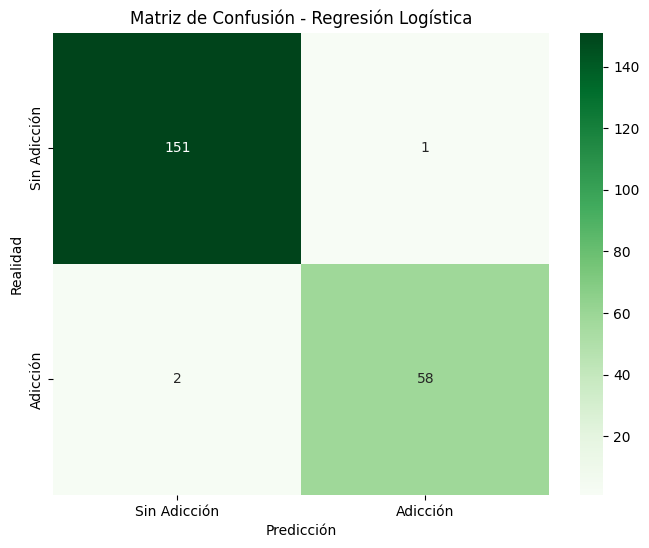

In [11]:
conf_matrix_rl = confusion_matrix(y_test_rl, y_pred_rl)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rl, annot=True, fmt='d', cmap='Greens', xticklabels=['Sin Adicción', 'Adicción'], yticklabels=['Sin Adicción', 'Adicción'])
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

**$\cdot$ Modelo de clasificación 2:**
*Random Forest*

In [12]:
#Ocupamos la misma división de datos que el modelo anterior

x_train_rf, x_test_rf, y_train_rf, y_test_rf = x_train.copy(), x_test.copy(), y_train.copy(), y_test.copy()

In [13]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(random_state=42)

modelo_rf.fit(x_train_rf,y_train_rf)

RandomForestClassifier(random_state=42)

In [14]:
y_pred_rf = modelo_rf.predict(x_test_rf)
print("Reporte de clasificación para Random Forest:\n")
print(classification_report(y_test_rf, y_pred_rf))

Reporte de clasificación para Random Forest:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       152
           1       0.98      0.97      0.97        60

    accuracy                           0.99       212
   macro avg       0.98      0.98      0.98       212
weighted avg       0.99      0.99      0.99       212



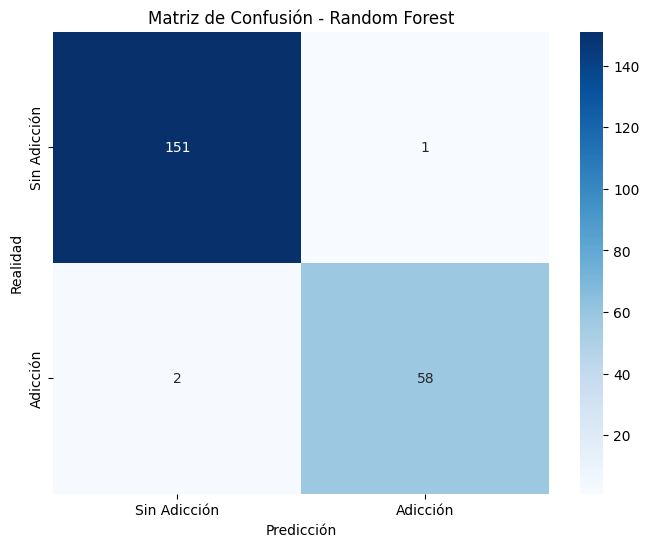

In [15]:
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Sin Adicción', 'Adicción'], yticklabels=['Sin Adicción', 'Adicción'])
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

**$\cdot$ Análisis de métricas de comparación:**

### *Optimización de los modelos*

In [16]:
from sklearn.model_selection import GridSearchCV

#Regresión Logística

print("Optimización para Regresión Logística")
param_grid_rl = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
grid_rl = GridSearchCV(LogisticRegression(max_iter=2000, random_state=42), param_grid_rl, cv=5, scoring='accuracy', n_jobs=-1)
grid_rl.fit(x_train_rl, y_train_rl)

print(f"Mejores parámetros para Regresión Logística: {grid_rl.best_params_}")
print(f"Mejor accuracy en CV: {grid_rl.best_score_:.4f}")

modelo_rl_optimizado = grid_rl.best_estimator_
y_pred_rl_opt = modelo_rl_optimizado.predict(x_test_rl)

print("\nReporte de clasificación para Regresión Logística Optimizada:")
print(classification_report(y_test_rl, y_pred_rl_opt))
conf_matrix_rl_opt = confusion_matrix(y_test_rl, y_pred_rl_opt)
print("Matriz de confusión RL Optimizada:\n", conf_matrix_rl_opt)


Optimización para Regresión Logística
Mejores parámetros para Regresión Logística: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Mejor accuracy en CV: 0.9980

Reporte de clasificación para Regresión Logística Optimizada:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       152
           1       0.98      0.97      0.97        60

    accuracy                           0.99       212
   macro avg       0.98      0.98      0.98       212
weighted avg       0.99      0.99      0.99       212

Matriz de confusión RL Optimizada:
 [[151   1]
 [  2  58]]


In [17]:
# Random Forest

print("\nOptimización para Random Forest")
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(x_train_rf, y_train_rf)

print(f"Mejores parámetros para Random Forest: {grid_rf.best_params_}")
print(f"Mejor accuracy en CV: {grid_rf.best_score_:.4f}")

modelo_rf_optimizado = grid_rf.best_estimator_
y_pred_rf_opt = modelo_rf_optimizado.predict(x_test_rf)
print("\nReporte de clasificación para Random Forest Optimizado:")
print(classification_report(y_test_rf, y_pred_rf_opt))
conf_matrix_rf_opt = confusion_matrix(y_test_rf, y_pred_rf_opt)
print("Matriz de confusión RF Optimizado:\n", conf_matrix_rf_opt)


Optimización para Random Forest
Mejores parámetros para Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mejor accuracy en CV: 0.9980

Reporte de clasificación para Random Forest Optimizado:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       152
           1       0.98      0.97      0.97        60

    accuracy                           0.99       212
   macro avg       0.98      0.98      0.98       212
weighted avg       0.99      0.99      0.99       212

Matriz de confusión RF Optimizado:
 [[151   1]
 [  2  58]]


##### Vistos los resultados podemos concluir que la optimización por hiperparámetros usando GridSearchCV no hizo ninguna mejora, ya que para ambos casos, los mejores parámetros son los default 

### *Balance de clases*

In [18]:
print("Balance de clases en y_train:")
print(y_train.value_counts(normalize=True))
print(y_train.value_counts())

Balance de clases en y_train:
Adiccion_binaria
0    0.718053
1    0.281947
Name: proportion, dtype: float64
Adiccion_binaria
0    354
1    139
Name: count, dtype: int64


##### Se puede apreciar que un 71.8% es no adicto y un 28.19% es adicto, por lo que hay un desbalance moderado

In [19]:
modelo_rl_balanced = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced', **grid_rl.best_params_)
modelo_rl_balanced.fit(x_train_rl, y_train_rl)
y_pred_rl_balanced = modelo_rl_balanced.predict(x_test_rl)

print("\nRegresión Logística con class_weight='balanced'")
print(classification_report(y_test_rl, y_pred_rl_balanced))
print("Matriz de confusión RL con class_weight:\n", confusion_matrix(y_test_rl, y_pred_rl_balanced))


Regresión Logística con class_weight='balanced'
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       152
           1       0.98      0.97      0.97        60

    accuracy                           0.99       212
   macro avg       0.98      0.98      0.98       212
weighted avg       0.99      0.99      0.99       212

Matriz de confusión RL con class_weight:
 [[151   1]
 [  2  58]]


In [20]:
modelo_rf_balanced = RandomForestClassifier(random_state=42, class_weight='balanced', **grid_rf.best_params_)
modelo_rf_balanced.fit(x_train_rf, y_train_rf)
y_pred_rf_balanced = modelo_rf_balanced.predict(x_test_rf)

print("\nRandom Forest con class_weight='balanced'")
print(classification_report(y_test_rf, y_pred_rf_balanced))
print("Matriz de confusión RF con class_weight:\n", confusion_matrix(y_test_rf, y_pred_rf_balanced))


Random Forest con class_weight='balanced'
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       152
           1       0.98      0.97      0.97        60

    accuracy                           0.99       212
   macro avg       0.98      0.98      0.98       212
weighted avg       0.99      0.99      0.99       212

Matriz de confusión RF con class_weight:
 [[151   1]
 [  2  58]]


#### *Como se puede apreciar, el recall no cambia en absoluto, ya que el modelo original ya manejaba bien el desbalance presentado*

## Explicación de las predicciones

In [21]:
#Nombres de las columnas después de get_dummies
feature_names = x_train_rl.columns
coefs_rl = pd.DataFrame(
    modelo_rl.coef_[0], # Acceder al array de coeficientes
    columns=['Coeficiente'], index=feature_names
)
coefs_rl['Coef_Absoluto'] = np.abs(coefs_rl['Coeficiente'])
print("Top 10 características por magnitud de coeficiente en Regresión Logística:")
print(coefs_rl.sort_values(by='Coef_Absoluto', ascending=False).head(10))
print("\nUn coeficiente positivo grande indica que la característica empuja hacia la clase 'Adicto'")
print("Un coeficiente negativo grande (magnitud grande) indica que empuja hacia la clase 'No Adicto'")


Top 10 características por magnitud de coeficiente en Regresión Logística:
                          Coeficiente  Coef_Absoluto
Conflictos_Social_Media      3.496886       3.496886
Score_salud_mental          -2.684198       2.684198
Plataforma_fav_TikTok        1.192858       1.192858
Prom_diario_uso_hrs          1.022406       1.022406
Relaciones_En relacion       0.874026       0.874026
Pais_Spain                   0.843004       0.843004
Pais_Italy                   0.656303       0.656303
Plataforma_fav_Instagram    -0.596656       0.596656
Hrs_sueo_por_noche         -0.559993       0.559993
Relaciones_Soltero-a        -0.515412       0.515412

Un coeficiente positivo grande indica que la característica empuja hacia la clase 'Adicto'
Un coeficiente negativo grande (magnitud grande) indica que empuja hacia la clase 'No Adicto'


Conflictos_Social_Media            0.296971
Score_salud_mental                 0.208788
Hrs_sueo_por_noche                0.141689
Prom_diario_uso_hrs                0.120095
Afecta_performance_academico_Si    0.028056
Plataforma_fav_TikTok              0.023624
Nivel_academico                    0.019835
Edad                               0.016399
Sexo                               0.011430
Pais_USA                           0.011420
dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27292\441785772.py:12: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


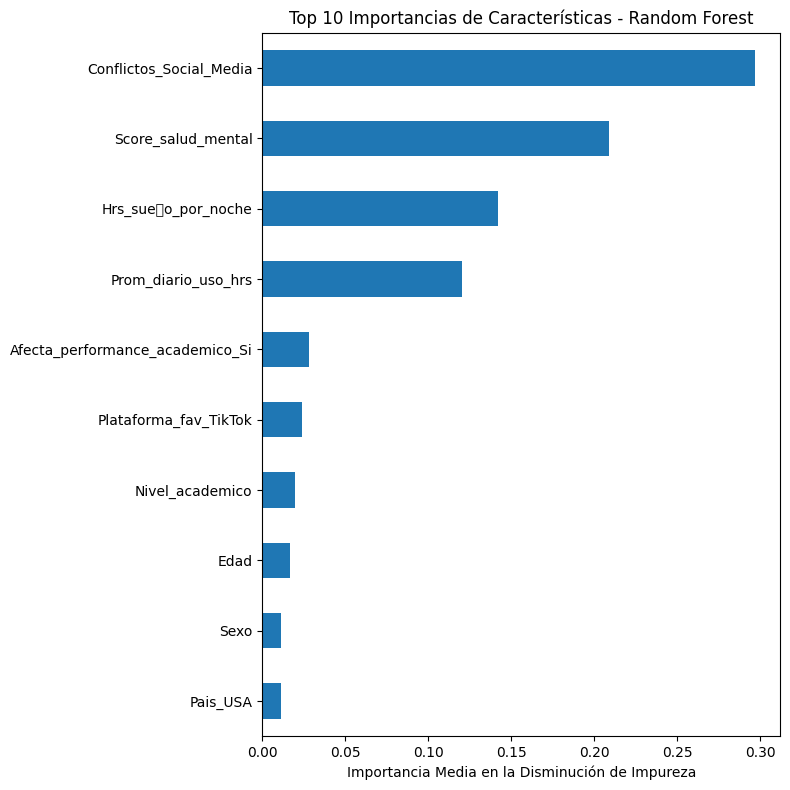

In [22]:
# Para Random Forest (importancia de características)
importances_rf = modelo_rf_optimizado.feature_importances_
forest_importances = pd.Series(importances_rf, index=feature_names)

top10 = forest_importances.sort_values(ascending=False).head(10)
print(top10)

fig, ax = plt.subplots(figsize=(8, 8))
top10.sort_values().plot.barh(ax=ax)
ax.set_title("Top 10 Importancias de Características - Random Forest")
ax.set_xlabel("Importancia Media en la Disminución de Impureza")
fig.tight_layout()
plt.show()

In [23]:
df_test_original = df.loc[x_test.index]

y_pred_rf_series = pd.Series(y_pred_rf, index=y_test.index)

# Verdadero Positivo
vp_indices = y_test[(y_test == 1) & (y_pred_rf_series == 1)].index
vp_idx = vp_indices[0] if len(vp_indices) > 0 else None

# Verdadero Negativo
vn_indices = y_test[(y_test == 0) & (y_pred_rf_series == 0)].index
vn_idx = vn_indices[0] if len(vn_indices) > 0 else None

# Falso Negativo 
fn_indices = y_test[(y_test == 1) & (y_pred_rf_series == 0)].index
fn_idx = fn_indices[0] if len(fn_indices) > 0 else None

print("----------- Instancias seleccionadas -----------")

print(f"\nEstudiante VP (ID: {vp_idx})")
print(df_test_original.loc[vp_idx, nombres_col + ['Score_adiccion']])

----------- Instancias seleccionadas -----------

Estudiante VP (ID: 357)
Edad                                     19
Sexo                                      0
Nivel_academico                           1
Pais                                    USA
Prom_diario_uso_hrs                     7.1
Plataforma_fav                    Instagram
Afecta_performance_academico             Si
Hrs_sueo_por_noche                     5.2
Score_salud_mental                        5
Relaciones                      En relacion
Conflictos_Social_Media                   4
Score_adiccion                            9
Name: 357, dtype: object


*Este estudiante fue correctamente marcado como Adicto, ya que tiene indicadores fuertes, como el promedio de uso diario de 7.1 hrs, 5.2 hrs de sueño, score de salud mental 5 y afectado su rendimiendo academico. Todos estos indicadores implican muy fuertemente que el estudiante es un Adicto*

In [24]:
print(f"\nEstudiante VN (ID: {vn_idx})")
print(df_test_original.loc[vn_idx, nombres_col + ['Score_adiccion']])


Estudiante VN (ID: 306)
Edad                                   21
Sexo                                    1
Nivel_academico                         2
Pais                                Italy
Prom_diario_uso_hrs                   5.0
Plataforma_fav                  Instagram
Afecta_performance_academico           Si
Hrs_sueo_por_noche                   7.1
Score_salud_mental                      5
Relaciones                      Soltero-a
Conflictos_Social_Media                 3
Score_adiccion                          7
Name: 306, dtype: object


*Este estudiante fue correctamente marcado como No Adicto, ya que tiene indicadores que lo protegen de la Adicción, como un uso diario de 5 hrs (el promedio de los datos es 4.91), hrs de sueño buenas(7.1), además que según el score de adicción y la clasificación de adicción binaria(es Adicto con score mayor a 8), no cuenta con una adiccion*

In [25]:
print(f"\nEstudiante FN (ID: {fn_idx})")
print(df_test_original.loc[fn_idx, nombres_col + ['Score_adiccion']])
print("\nCaracterísticas one-hot encoded para el modelo:")
print(x_test_rf.loc[fn_idx][x_test_rf.loc[fn_idx] != 0].sort_values(ascending=False).head(10))


Estudiante FN (ID: 8)
Edad                                     20
Sexo                                      0
Nivel_academico                           1
Pais                                 Brazil
Prom_diario_uso_hrs                     5.8
Plataforma_fav                     Snapchat
Afecta_performance_academico             Si
Hrs_sueo_por_noche                     6.0
Score_salud_mental                        6
Relaciones                      En relacion
Conflictos_Social_Media                   2
Score_adiccion                            8
Name: 8, dtype: object

Características one-hot encoded para el modelo:
Edad                                 20
Hrs_sueo_por_noche                 6.0
Score_salud_mental                    6
Prom_diario_uso_hrs                 5.8
Conflictos_Social_Media               2
Nivel_academico                       1
Pais_Brazil                        True
Plataforma_fav_Snapchat            True
Afecta_performance_academico_Si    True
Relaciones_En rel

*Este caso es un falso negativo, ya que debió haber sido calificado como Adicto (Su score de adiccion es >=8). Este error puede haber ocurrido por cosas como su Score salud mental, que al ser 6 está cercano al promedio (6.2) y conflictos social media con valor de 2, lo cual también se encuentra por debajo de la media (2.8). Sin embargo, las 6 horas de sueño y las 5.8 horas de uso diario son importantes, el modelo no los encontró lo suficientemente relevantes para contrarrestar las cosas anteriormente mencionadas*

# **Problema 2**
## ***Reducción de dimensionalidad***

## **$\bullet$ Pregunta 1 (2.0 Puntos)**

Usted deberá comparar dos algoritmos de reducción de dimensionalidad. El primero es Principal component analysis (PCA), el segundo queda a su elección.

### **$\cdot$ Pregunta 1.1 **

Explique en sus palabras el funcionamiento de cada algoritmo de forma detallada. Esto es: explicar su funcionamiento, sus principales parámetros, sus limitaciones y sus ventajas por sobre otros algoritmos similares.

**$\cdot$ Algoritmo 1:** *(Escriba su respuesta aquí)*

In [26]:
df2 = pd.read_csv("P2_Spotify.csv", sep=';', encoding='latin1', index_col='id')
df2

,artist_name,genres,followers,artist_popularity,artist_url,track_name,album_name,release_date,duration_ms,explicit,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
id,,,,,,,,,,,,,,,,,,,,,
0,Ariana Grande,pop,98934105,89,https://open.spotify.com/artist/66CXWjxzNUsdJx...,we can't be friends (wait for your love),eternal sunshine,08-03-24,228639,False,...,0.646,5,-8.334,1,0.0427,0.0615,3.04e-05,0.0740,0.295,115.842
1,Ariana Grande,pop,98934105,85,https://open.spotify.com/artist/66CXWjxzNUsdJx...,the boy is mine,eternal sunshine,08-03-24,173639,True,...,0.630,7,-5.854,0,0.0434,0.157,0.0,0.0732,0.447,97.998
2,Ariana Grande,pop,98934105,83,https://open.spotify.com/artist/66CXWjxzNUsdJx...,intro (end of the world),eternal sunshine,08-03-24,92400,True,...,0.362,10,-9.480,1,0.0416,0.67,0.0,0.1760,0.385,84.726
3,Ariana Grande,pop,98934105,80,https://open.spotify.com/artist/66CXWjxzNUsdJx...,Save Your Tears (Remix) (with Ariana Grande) -...,After Hours (Deluxe),20-03-20,191013,False,...,0.825,0,-4.645,1,0.0325,0.0215,2.44e-05,0.0936,0.593,118.091
4,Ariana Grande,pop,98934105,79,https://open.spotify.com/artist/66CXWjxzNUsdJx...,"yes, and?",eternal sunshine,08-03-24,214994,True,...,0.775,1,-6.614,1,0.0548,0.19,6.54e-05,0.1130,0.787,118.998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Outkast,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,69,https://open.spotify.com/artist/1G9G7WwrXka3Z1...,Roses,Speakerboxxx/The Love Below,2003,369573,True,...,0.708,0,-5.653,1,0.0545,0.0482,1.85e-05,0.1070,0.509,108.970
996,Outkast,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,64,https://open.spotify.com/artist/1G9G7WwrXka3Z1...,Rosa Parks,Aquemini,29-09-98,324373,True,...,0.701,6,-7.198,0,0.2830,0.105,0.0,0.7610,0.251,103.890
997,Outkast,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,60,https://open.spotify.com/artist/1G9G7WwrXka3Z1...,B.O.B. - Bombs Over Baghdad,Stankonia,31-10-00,304226,True,...,0.978,9,-5.324,1,0.0978,0.0555,4.11e-05,0.0260,0.653,153.809


In [27]:
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   artist_name        1000 non-null   object 
 1   genres             837 non-null    object 
 2   followers          1000 non-null   int64  
 3   artist_popularity  1000 non-null   int64  
 4   artist_url         1000 non-null   object 
 5   track_name         1000 non-null   object 
 6   album_name         1000 non-null   object 
 7   release_date       1000 non-null   object 
 8   duration_ms        1000 non-null   int64  
 9   explicit           1000 non-null   bool   
 10  track_popularity   1000 non-null   int64  
 11  danceability       1000 non-null   float64
 12  energy             1000 non-null   float64
 13  key                1000 non-null   int64  
 14  loudness           1000 non-null   float64
 15  mode               1000 non-null   int64  
 16  speechiness        1000 non-nu

,followers,artist_popularity,duration_ms,track_popularity,danceability,energy,key,loudness,mode,speechiness,liveness,valence,tempo
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.150655e+07,59.429000,212368.619000,59.429000,0.611430,0.660562,5.243000,-7.160373,0.613000,0.091402,0.188810,0.516641,122.143448
std,2.293890e+07,23.884963,65706.472572,23.884963,0.167246,0.207568,3.613725,4.479642,0.487307,0.090441,0.145454,0.232896,28.053658
min,2.000000e+00,0.000000,51680.000000,0.000000,0.069000,0.003540,0.000000,-39.482000,0.000000,0.023200,0.026000,0.032600,49.305000
25%,1.038784e+06,57.000000,173083.000000,57.000000,0.505500,0.539500,2.000000,-8.334250,0.000000,0.037975,0.095700,0.343500,99.983500
50%,3.923159e+06,67.000000,204382.500000,67.000000,0.634000,0.680500,5.000000,-5.943500,1.000000,0.054800,0.129000,0.522000,122.073500
75%,1.142132e+07,74.000000,244192.750000,74.000000,0.728250,0.820000,9.000000,-4.582500,1.000000,0.106000,0.246500,0.686250,138.667250
max,1.194287e+08,92.000000,707160.000000,92.000000,0.964000,0.998000,11.000000,0.273000,1.000000,0.874000,0.984000,0.973000,201.776000


In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df2['acousticness'] = pd.to_numeric(df2['acousticness'], errors='coerce')
df2['instrumentalness'] = pd.to_numeric(df2['instrumentalness'], errors='coerce')
df2['explicit'] = df2['explicit'].astype(int)

columnas_numericas = [
    'followers', 'artist_popularity', 'duration_ms', 'explicit', 'track_popularity',
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

x_spotify = df2[columnas_numericas].copy()
x_spotify = x_spotify.fillna(x_spotify.mean())

scaler = StandardScaler()
x_spotify = scaler.fit_transform(x_spotify)

pca = PCA(n_components=2)
x_spotify_pca = pca.fit_transform(x_spotify)
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza total explicada:", pca.explained_variance_ratio_.sum())


Varianza explicada por cada componente: [0.20157909 0.13424439]
Varianza total explicada: 0.33582347141155


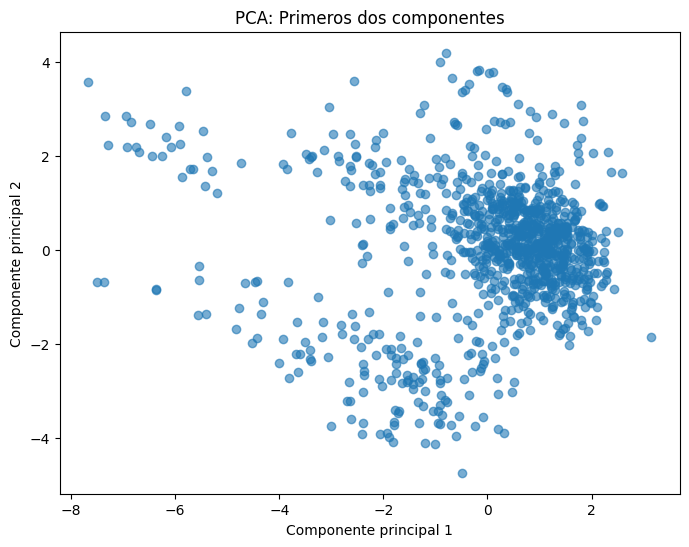

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(x_spotify_pca[:,0], x_spotify_pca[:,1], alpha=0.6)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('PCA: Primeros dos componentes')
plt.show()

**$\cdot$ Algoritmo 2:** *(Escriba su respuesta aquí)*

### **$\cdot$ Pregunta 1.2 **

A modo preliminar de visualización, reduzca la dimensión de los datos a D=4 utilizando ambos algoritmos. Luego realice un gráfico de estos datos reducidos. Compare los resultados obtenidos con el algoritmo [t-SNE](https://scikit-learn.org/dev/auto_examples/manifold/plot_t_sne_perplexity.html).

¿Qué algoritmo funciona mejor para visualizar los datos?

¿Por qué ocurre esto?

In [28]:
from sklearn.manifold import TSNE # Para graficar utilice esta implemntación de t-SNE

## **$\bullet$ Pregunta 2

¿Cuantas dimensiones son suficientes para representar mis datos?

En este item usted debe **justificar** bajo algún criterio la elección de la dimensión elegida para representar el conjunto de imágenes. Realice esto para ambos algoritmos seleccionados previamente y decida cual algortimo funciona mejor.

> **Observación: La elección de la dimension reducida y algoritmo sin justificación no obtendrán puntaje.**

# **$\bullet$ Clustering (2.0 puntos)**
---
En este ítem usted debe utilizar el dataset con dimensionalidad reducida visto en la pregunta anterior y aplicar un algoritmo de clustering de su elección. Para obtener todo el puntaje usted debe realizar los siguientes puntos

*   Utilice alguna métrica para evaluar cuantos clusters definen correctamente su conjunto de datos (La métrica a utilizar depende del tipo de algortimo de clustering, pero las más tipicas son: *Inercia*, *Silhouette*, $BIC-AIC$, entre otros). Justifique cual es el mejor número de clusters que representan a los datos.
*   Compare diferentes variantes de su mismo algoritmo (esto puede ser a nivel de hiperparámetros, o distintas versiones de este mismo y vea cual funciona mejor comparando su métrica y tiempo total en computación.
*   Analice los resultados en función de cómo se organizaron los cluster, ¿qué relación tienen los datos? Ej: en el cluster 1 se agrupan los datos con características XXXXXXXX; en el cluster 2 se observan los datos YYYYYY, etc.

